# Statistical Power - Lab

## Introduction


In this lesson, you'll practice doing a power-analysis during experimental design. As you've seen, power analysis allows you to determine the sample size required to detect an effect of a given size with a given degree of confidence. In other words, it allows you to determine the probability of detecting an effect of a given size with a given level of confidence, under-sample size constraints.

## Objectives

In this lab you will: 

- Describe the impact of sample size and effect size on power 
- Perform power calculation using SciPy and Python 
- Demonstrate the combined effect of sample size and effect size on statistical power using simulations

## Let's get started!

The following four factors have an intimate relationship:

* Sample size
* Effect size
* Significance level = $\alpha$ = P(Type I error) = probability of finding an effect that is not there
* **Power = 1 - $\beta$ = 1 - P(Type II error)** = probability of finding an effect that is there
    * where $\beta$ is the probability of a Type II error, i.e. the probability of failing to reject a false null hypothesis

Given any three of these, we can easily determine the fourth.
  
To start, let's import the necessary libraries required for this simulation: 

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Scenario

A researcher wants to study how daily protein supplementation in the elderly population will affect baseline liver fat. The study budget will allow enrollment of 24 patients. Half will be randomized to a placebo group and half to the protein supplement treatment group and the trial will be carried out over one month. It is desired to see whether the mean change in percentage of liver fat from baseline to the end of the study differs between the two groups in the study. 

With this, the researcher writes the null hypothesis: 

    There is no difference between experimental and control group mean change in percentage of liver fat 
    
$$\mu_{1} = \mu_{2}$$
  
And the alternative Hypothesis:

    There is a difference between experimental and control group mean change in percentage of liver fat 

$$\mu_{1} \neq \mu_{2}$$
    
  

The researcher needs to know what power  will be obtained under the sample size restrictions to identify a change in mean percent liver fat of 0.17. Based on past results, a common standard deviation of 0.21 will be used for each treatment group in the power analysis. 

To determine the practicality of this experimental design, you'll run a power analysis simulation: 

In [2]:
# Number of patients in each group
sample_size = None

# Control group
control_mean = None
control_sd = None

# Experimental group
experimental_mean = None
experimental_sd = None

# Set the number of simulations for our test = 1000
n_sim = None

You can now start running simulations to run an independent t-test with above data and store the calculated p-value in our `p` array. Perform following tasks: 

* Initialize a numpy array and fill it with `NaN` values for storing the results (p_value) of the independent t-test  
* For a defined number of simulations (i.e., 1000), do the following:

    * Generate a random normal variable with control mean and sd
    * Generate a random normal variable with experimental mean and sd
    * Run and independent t-test using control and experimental data
    * Store the p value for each test

* Calculate the total number and overall proportion of simulations where the null hypothesis is rejected


In [3]:
# For reproducibility 
np.random.seed(10)

# Initialize array to store results
p = (np.empty(n_sim))
p.fill(np.nan)

#  Run a for loop for range of values in n_sim

# number of null hypothesis rejections
num_null_rejects = None
power = None

power

# 0.495

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9884\4082228588.py:5: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  p = (np.empty(n_sim))


These results indicate that using 12 participants in each group and with given statistics, the statistical power of the experiment is 49%. This can be interpreted as follows:

> **If a large effect (0.17 or greater) is truly present between control and experimental groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 49% of the time. **

## Sample size requirements for a given effect size

Often in behavioral research 0.8 is accepted as a sufficient level of power.  

Clearly, this is not the case for the experiment as currently designed. Determine the required sample size in order to identify a difference of 0.17 or greater between the group means with an 80% power.

In [4]:
# Required power
target = 0.8

In [5]:
from statsmodels.stats.power import TTestIndPower
power = TTestIndPower()

In [9]:
# Determine the sample size
effect_size = 0.17
alpha = 0.05
power = 0.8

power_analysis = TTestIndPower()

sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
sample_size


544.1357761564456

In [10]:
# Minimum sample size to start the simulations 
sample_size = 12
null_rejected = 0
n_sim = 10000

As above, perform the following

* Initialize an empty array for storing results
* initialize a list for storing sample size x power summary
* While current power is less than the target power
    * Generate distributions for control and experimental groups using given statistics (as before)
    * Run a t-test and store results
    * Calculate current power 
    * Output current sample size and power calculated for inspection
    * Store results: Sample size, power
    * increase the sample size by 1 and repeat

In [11]:
np.random.seed(10)

p = (np.empty(n_sim))
p.fill(np.nan)

power_sample = []

# Keep iterating as shown above until desired power is obtained

    

You can also plot the calculated power against sample size to visually inspect the effect of increasing sample size. 

Sample size: 10, Power: 0.0
Sample size: 11, Power: 0.0
Sample size: 12, Power: 0.0
Sample size: 13, Power: 0.0
Sample size: 14, Power: 0.0
Sample size: 15, Power: 0.0
Sample size: 16, Power: 0.0
Sample size: 17, Power: 0.0
Sample size: 18, Power: 0.0
Sample size: 19, Power: 0.0
Sample size: 20, Power: 0.0
Sample size: 21, Power: 0.0
Sample size: 22, Power: 0.0
Sample size: 23, Power: 0.0
Sample size: 24, Power: 0.0
Sample size: 25, Power: 1.0


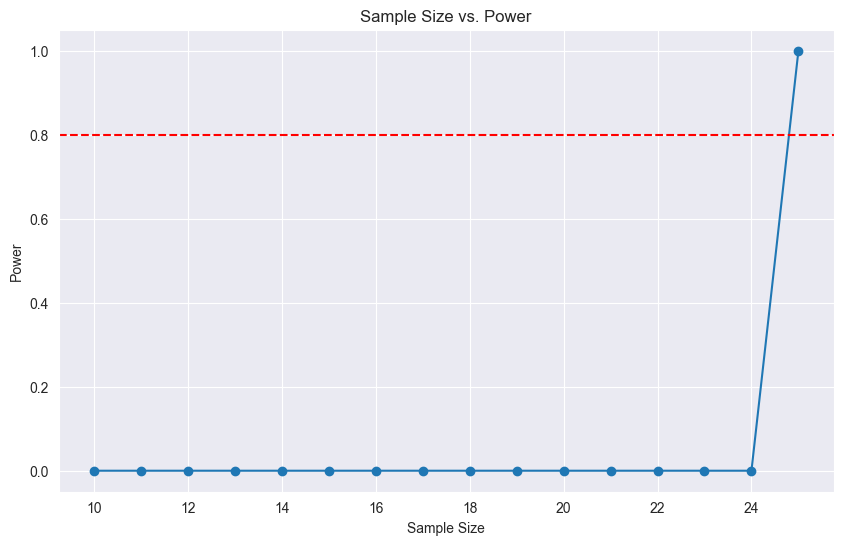

In [13]:
# Plot a sample size X Power line graph
np.random.seed(10)
target_power = 0.8
effect_size = 0.17
alpha = 0.05
n_sim = 1000

# Initialize the storage for p-values and power
p_values = np.empty(n_sim)
p_values.fill(np.nan)

power_sample = []
 
sample_size = 10
current_power = 0

while current_power < target_power:
    # Generate distributions for control and experimental groups
    control_group = np.random.normal(loc=0, scale=1, size=sample_size)
    experimental_group = np.random.normal(loc=effect_size, scale=1, size=sample_size)
    
    # Run a t-test
    for i in range(n_sim):
        t_stat, p_values[i] = stats.ttest_ind(control_group, experimental_group)
    
    # Calculate current power
    current_power = np.mean(p_values < alpha)
    
    # Output current sample size and power for inspection
    print(f"Sample size: {sample_size}, Power: {current_power}")
    
    # Store results: Sample size, power
    power_sample.append((sample_size, current_power))
    
    # Increase the sample size by 1
    sample_size += 1

# Extract the sample sizes and power values for plotting
sample_sizes = [x[0] for x in power_sample]
powers = [x[1] for x in power_sample]

# Plot the sample size vs. power graph
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Sample Size vs. Power')
plt.grid(True)
plt.axhline(y=target_power, color='r', linestyle='--')
plt.show()

This output indicates that in order to get the required power (80%) to detect a difference of 0.17, you would need a considerably higher number of patients. 

## BONUS: Investigating the relationship between Power, Sample Size, and Effect Size

You've seen how to calculate power given alpha, sample size, and effect size. To further investigate this relationship, it is interesting to plot the relationship between power and sample size for various effect sizes. 

To do this, run multiple simulations for varying parameters. Then store the parameters and plot the resulting dataset. Specifically:

1. Use a value of $\alpha$ = 0.05 for all of your simulations
2. Use the following effect sizes: [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
3. Use the sample sizes from 10 to 500
4. For each effect size sample size combination, calculate the accompanying power
5. Plot a line graph of the power vs sample size relationship. You should have 7 plots; one for each of the effect sizes listed above. All 7 plots can be on the same graph but should be labeled appropriately. Plot the power on the y-axis and sample size on the x-axis.

Effect size: 0.01, Sample size: 10, Power: 0.054
Effect size: 0.01, Sample size: 20, Power: 0.05
Effect size: 0.01, Sample size: 30, Power: 0.057
Effect size: 0.01, Sample size: 40, Power: 0.046
Effect size: 0.01, Sample size: 50, Power: 0.06
Effect size: 0.01, Sample size: 60, Power: 0.057
Effect size: 0.01, Sample size: 70, Power: 0.053
Effect size: 0.01, Sample size: 80, Power: 0.038
Effect size: 0.01, Sample size: 90, Power: 0.04
Effect size: 0.01, Sample size: 100, Power: 0.04
Effect size: 0.01, Sample size: 110, Power: 0.059
Effect size: 0.01, Sample size: 120, Power: 0.054
Effect size: 0.01, Sample size: 130, Power: 0.048
Effect size: 0.01, Sample size: 140, Power: 0.052
Effect size: 0.01, Sample size: 150, Power: 0.054
Effect size: 0.01, Sample size: 160, Power: 0.045
Effect size: 0.01, Sample size: 170, Power: 0.048
Effect size: 0.01, Sample size: 180, Power: 0.059
Effect size: 0.01, Sample size: 190, Power: 0.051
Effect size: 0.01, Sample size: 200, Power: 0.053
Effect size: 

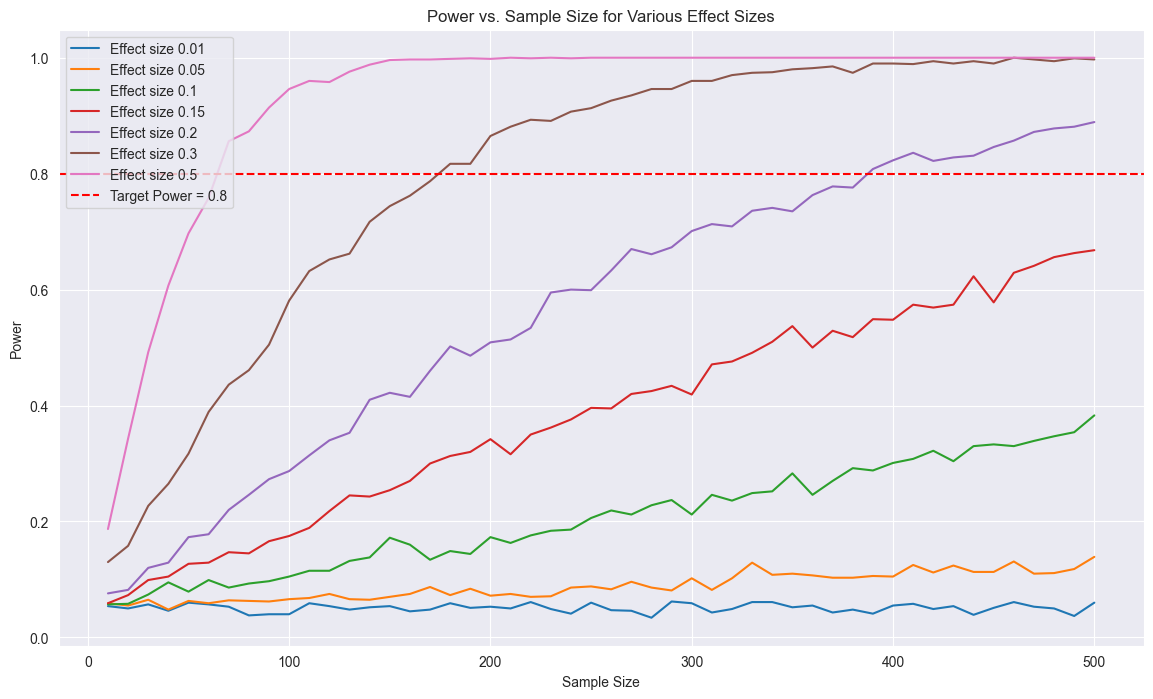

In [14]:
# Parameters
np.random.seed(10)
alpha = 0.05
n_sim = 1000
effect_sizes = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
sample_sizes = np.arange(10, 501, 10)

# Initialize the storage for power values
power_results = {effect_size: [] for effect_size in effect_sizes}

# Run the simulations
for effect_size in effect_sizes:
    for sample_size in sample_sizes:
        significant_results = 0
        for _ in range(n_sim):
            control_group = np.random.normal(loc=0, scale=1, size=sample_size)
            experimental_group = np.random.normal(loc=effect_size, scale=1, size=sample_size)
            t_stat, p_value = stats.ttest_ind(control_group, experimental_group)
            if p_value < alpha:
                significant_results += 1
        current_power = significant_results / n_sim
        power_results[effect_size].append(current_power)
        print(f"Effect size: {effect_size}, Sample size: {sample_size}, Power: {current_power}")

# Plot the results
plt.figure(figsize=(14, 8))
for effect_size in effect_sizes:
    plt.plot(sample_sizes, power_results[effect_size], label=f'Effect size {effect_size}')

plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power vs. Sample Size for Various Effect Sizes')
plt.axhline(y=0.8, color='r', linestyle='--', label='Target Power = 0.8')
plt.legend()
plt.grid(True)
plt.show()


## Summary

In this lesson, you gained further practice with "statistical power" and how it can be used to analyze experimental design. You ran a simulation to determine the sample size that would provide a given value of power (for a given alpha and effect size). Running simulations like this, as well as further investigations regarding required sample sizes for higher power thresholds or smaller effect sizes is critical in designing meaningful experiments where one can be confident in the subsequent conclusions drawn.